In [89]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

# Increasing Temperatures and Related Health Impacts

Student: Emily Nilson

## Exploratory Data Analysis

There is a separate Jupyter notebook for the collection and compilation of data. This notebook begins with the "final" DataFrame (not so final, as I still have to tidy it up a bit), but this was the output resulting from copious API queries and joining of multiple datasets.

### Climate Indicators and Abbreviations
The full description of each indicator is in the other notebook, but here's a brief explanation:

**Average High Temperature** (`tasmax`)
- Aggregated daily average high temperatures

**Extreme Heat Events** (`xhe`)
- Total times the daily average maximum temperature is above the 99th percentile of historic observations

**Heat Wave Incidents** (`hwi`)
- Days the daily high temperature exceeds 5˚C above historic average high temperature norms for at least 5 consecutive days

In [90]:
path = Path('.', 'final_df.csv')
final_df = pd.read_csv(path)

In [91]:
final_df.drop(columns={'Unnamed: 0'}, inplace=True)

In [92]:
final_df.head()

,state,city,latitude,longitude,azavea_id,population,2005,2006,2007,2008,...,xhe_2009_median,xhe_2010_min,xhe_2010_max,xhe_2010_median,hwi_2009_min,hwi_2009_max,hwi_2009_median,hwi_2010_min,hwi_2010_max,hwi_2010_median
0,Arizona,Phoenix,33.448,-112.097,9,1445632,324.0,336.0,312.0,297.0,...,7,0,55,7,0,5,1,0,3,1
1,California,Sacramento,38.577,-121.494,41,466488,495.0,1100.0,571.0,571.0,...,5,0,16,9,0,4,1,0,5,2
2,Colorado,Denver,39.739,-104.985,30,682545,49.0,29.0,28.0,22.0,...,6,0,35,7,0,3,1,0,5,1
3,Connecticut,Hartford,41.764,-72.682,1653,124006,46.0,54.0,41.0,46.0,...,8,0,24,8,0,3,1,0,4,1
4,Florida,Tallahassee,30.438,-84.281,138,189907,623.0,500.0,580.0,445.0,...,1,0,28,4,0,3,0,0,7,1


In [93]:
final_df.shape

(24, 30)

In [94]:
final_df.columns

Index(['state', 'city', 'latitude', 'longitude', 'azavea_id', 'population',
       '2005', '2006', '2007', '2008', '2009', '2010', 'tasmax_2009_min',
       'tasmax_2009_max', 'tasmax_2009_median', 'tasmax_2010_min',
       'tasmax_2010_max', 'tasmax_2010_median', 'xhe_2009_min', 'xhe_2009_max',
       'xhe_2009_median', 'xhe_2010_min', 'xhe_2010_max', 'xhe_2010_median',
       'hwi_2009_min', 'hwi_2009_max', 'hwi_2009_median', 'hwi_2010_min',
       'hwi_2010_max', 'hwi_2010_median'],
      dtype='object')

### Initial thoughts on cleaning up the data
Several columns here are irrelevant. I only have climate data for 2009 and 2010, so there is no need to keep the heat-related hospitalization data for 2005-2008. In addition, minimum extreme heat events and heat wave incidents means nothing. The more useful values to explore are the median and max. These extra columns will be removed.

In [95]:
final_df.drop(columns=['2005', '2006', '2007', '2008', 'xhe_2009_min', 'xhe_2010_min',
                       'hwi_2009_min', 'hwi_2010_min'], inplace=True)

In [96]:
# make it more clear that '2009' and '2010' refer to the # of heat-related hospitalizations

final_df.rename(columns={'2009': 'hosp_2009', '2010': 'hosp_2010'}, inplace=True)

### Data Shape

In [97]:
# verifying that 8 columns were removed
final_df.shape

(24, 22)

### Data Types

In [98]:
final_df.dtypes

state                  object
city                   object
latitude              float64
longitude             float64
azavea_id               int64
population              int64
hosp_2009             float64
hosp_2010             float64
tasmax_2009_min       float64
tasmax_2009_max       float64
tasmax_2009_median    float64
tasmax_2010_min       float64
tasmax_2010_max       float64
tasmax_2010_median    float64
xhe_2009_max            int64
xhe_2009_median         int64
xhe_2010_max            int64
xhe_2010_median         int64
hwi_2009_max            int64
hwi_2009_median         int64
hwi_2010_max            int64
hwi_2010_median         int64
dtype: object

### Handling Null Values

In [99]:
final_df.isnull().sum()

state                 0
city                  0
latitude              0
longitude             0
azavea_id             0
population            0
hosp_2009             1
hosp_2010             1
tasmax_2009_min       0
tasmax_2009_max       0
tasmax_2009_median    0
tasmax_2010_min       0
tasmax_2010_max       0
tasmax_2010_median    0
xhe_2009_max          0
xhe_2009_median       0
xhe_2010_max          0
xhe_2010_median       0
hwi_2009_max          0
hwi_2009_median       0
hwi_2010_max          0
hwi_2010_median       0
dtype: int64

#### Determine which row is null for hosp_2009 and hosp_2010

In [100]:
final_df.loc[:, 'hosp_2009'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
Name: hosp_2009, dtype: bool

In [101]:
final_df.loc[:, 'hosp_2010'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
Name: hosp_2010, dtype: bool

#### The null value is in the same row for both, row index #18

In [102]:
final_df.iloc[18]

state                 Rhode Island
city                    Providence
latitude                    41.831
longitude                  -71.415
azavea_id                      144
population                  179207
hosp_2009                      NaN
hosp_2010                      NaN
tasmax_2009_min            60.0764
tasmax_2009_max            63.3723
tasmax_2009_median         61.7399
tasmax_2010_min            59.1972
tasmax_2010_max            64.6051
tasmax_2010_median         61.8475
xhe_2009_max                    17
xhe_2009_median                  9
xhe_2010_max                    26
xhe_2010_median                 10
hwi_2009_max                     2
hwi_2009_median                  0
hwi_2010_max                     3
hwi_2010_median                  0
Name: 18, dtype: object

#### Handling the row with null values
Since the row for Providence is missing critical information, the # of heat-related hospitalizations for both 2009 and 2010, it makes most sense to remove that whole row from the DataFrame.

In [103]:
final_df.drop(axis=0, index=18, inplace=True)

In [104]:
final_df.shape

(23, 22)

### Basic Summary Statistics

In [105]:
final_df.describe()

,latitude,longitude,azavea_id,population,hosp_2009,hosp_2010,tasmax_2009_min,tasmax_2009_max,tasmax_2009_median,tasmax_2010_min,tasmax_2010_max,tasmax_2010_median,xhe_2009_max,xhe_2009_median,xhe_2010_max,xhe_2010_median,hwi_2009_max,hwi_2009_median,hwi_2010_max,hwi_2010_median
count,23.000000,23.000000,23.000000,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,39.942522,-91.202522,659.782609,2.743603e+05,127.826087,198.000000,64.060138,68.326462,66.215886,63.508222,69.014620,66.394128,21.086957,5.217391,27.00000,6.304348,4.217391,1.173913,4.826087,1.391304
std,4.558488,17.782434,695.482433,3.248705e+05,168.329939,214.160305,8.435867,8.241079,8.490056,8.319741,8.741806,8.556162,7.913814,1.905889,7.97154,1.663370,1.312753,0.650327,1.527094,0.656376
min,30.438000,-123.030000,9.000000,7.592000e+03,3.000000,5.000000,52.053515,56.729207,53.928265,51.783469,57.121503,54.131375,11.000000,1.000000,16.00000,4.000000,3.000000,0.000000,3.000000,0.000000
25%,37.176500,-105.462500,62.500000,6.720050e+04,22.000000,35.000000,58.417716,62.651297,60.507447,58.079951,63.499063,60.845519,15.000000,4.500000,22.50000,5.000000,3.000000,1.000000,4.000000,1.000000
50%,40.777000,-86.784000,138.000000,1.899070e+05,51.000000,121.000000,62.592966,66.748127,64.651643,61.044975,66.581158,64.743856,20.000000,6.000000,25.00000,7.000000,4.000000,1.000000,5.000000,1.000000
75%,43.141000,-75.630500,1294.000000,3.444800e+05,164.000000,234.500000,67.926023,71.947910,70.165166,66.901045,74.687758,70.588495,24.000000,6.000000,28.00000,8.000000,5.000000,2.000000,5.500000,2.000000
max,47.036000,-69.782000,1721.000000,1.445632e+06,607.000000,856.000000,83.841802,88.432810,86.879682,83.796703,88.443623,86.813756,40.000000,9.000000,55.00000,9.000000,7.000000,2.000000,8.000000,2.000000


### Distribution of Each Column

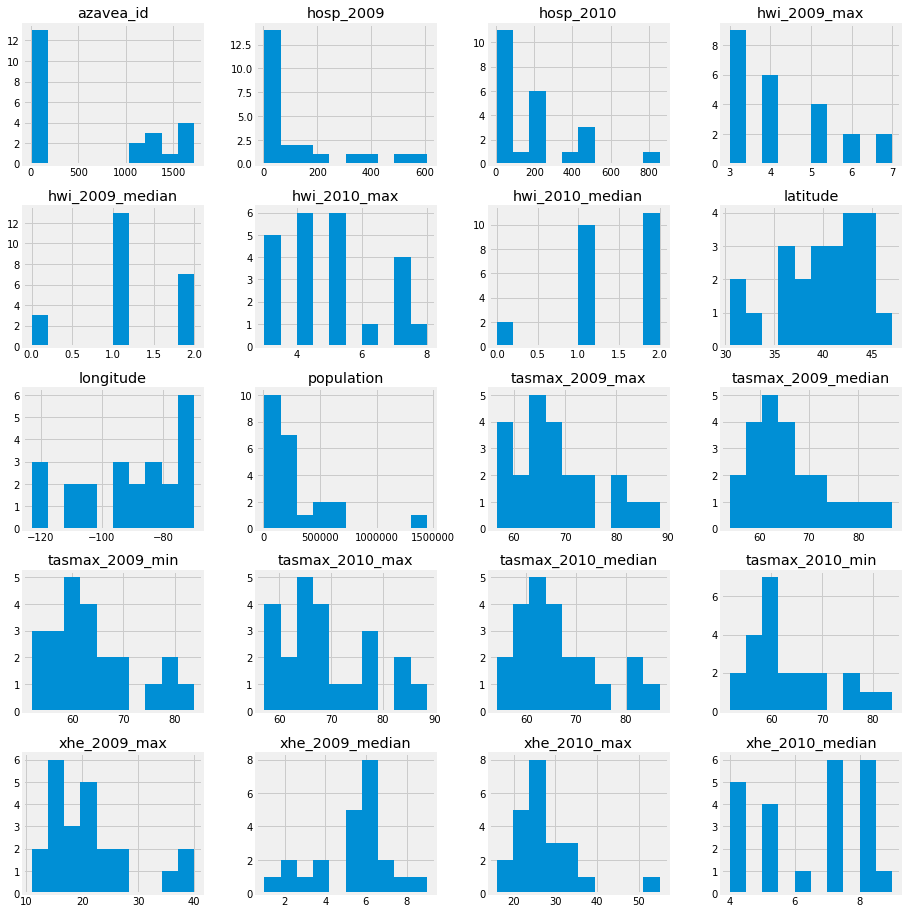

In [106]:
axes = final_df.hist(figsize=(14,16))

### Scatterplot of Each Column with Number of Hospitalizations

#### 2009 Average High Temp vs. 2009 Hospitalizations 

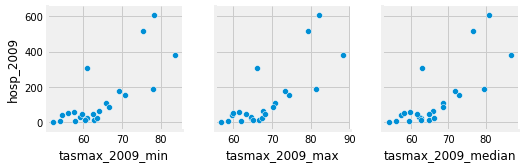

In [107]:
feature_cols = ['tasmax_2009_min', 'tasmax_2009_max', 'tasmax_2009_median']

g = sns.pairplot(final_df,
                x_vars = feature_cols, 
                y_vars = 'hosp_2009',
                kind = 'scatter')

#### 2010 Average High Temp vs. 2010 Hospitalizations 

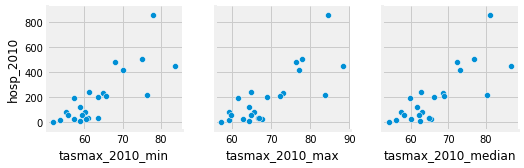

In [108]:
feature_cols = ['tasmax_2010_min', 'tasmax_2010_max', 'tasmax_2010_median']

g = sns.pairplot(final_df,
                x_vars = feature_cols, 
                y_vars = 'hosp_2010',
                kind = 'scatter')

#### 2009 Extreme Heat Events vs. 2009 Hospitalizations

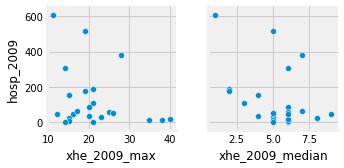

In [109]:
feature_cols = ['xhe_2009_max', 'xhe_2009_median']

g = sns.pairplot(final_df,
                x_vars = feature_cols, 
                y_vars = 'hosp_2009',
                kind = 'scatter')

#### 2010 Extreme Heat Events vs. 2010 Hospitalizations

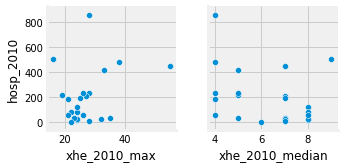

In [110]:
feature_cols = ['xhe_2010_max', 'xhe_2010_median']

g = sns.pairplot(final_df,
                x_vars = feature_cols, 
                y_vars = 'hosp_2010',
                kind = 'scatter')

#### 2009 Heat Wave Incidents vs. 2009 Hospitalizations

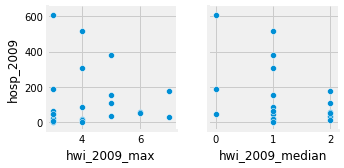

In [111]:
feature_cols = ['hwi_2009_max', 'hwi_2009_median']

g = sns.pairplot(final_df,
                x_vars = feature_cols, 
                y_vars = 'hosp_2009',
                kind = 'scatter')

#### 2010 Heat Wave Incidents vs. 2010 Hospitalizations

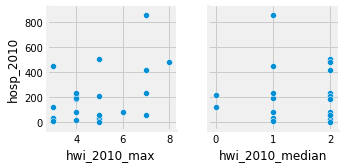

In [112]:
feature_cols = ['hwi_2010_max', 'hwi_2010_median']

g = sns.pairplot(final_df,
                x_vars = feature_cols, 
                y_vars = 'hosp_2010',
                kind = 'scatter')

# Concluding Notes

### Acknowledged Shortcomings

One shortcoming is that there are only 23 rows upon which I am doing analysis. This is primarily due to the limited data available from the CDC on heat-related hospitalizations, but also due to the few other rows that were removed because the Climate API not have data for the capital city. 

There does appear to be a linear relationship between average high temperature and hospitalizations, but it is difficult to spot relationships between hospitalizations and the other climate indicators.

I also fully acknowledge that I am looking at state-level hospitalizations and point-level data (25km<sup>2</sup>) for the climate indicators. Ideally, the variables would be at the same resolution. But climate data does generalize over areas.

### Next Steps

It would be great to find more data on number of heat-related hospitalizations. I will research other data sources, or see if there is another way to obtain data from the CDC (or other meaningful indicators). 
